# Algoritmos de optimización - Reto 2

Nombre: Carlos Cesar Meza Montalvo

URL : https://github.com/CarlitosIA/VIU/blob/main/Algoritmos_Reto2.ipynb

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

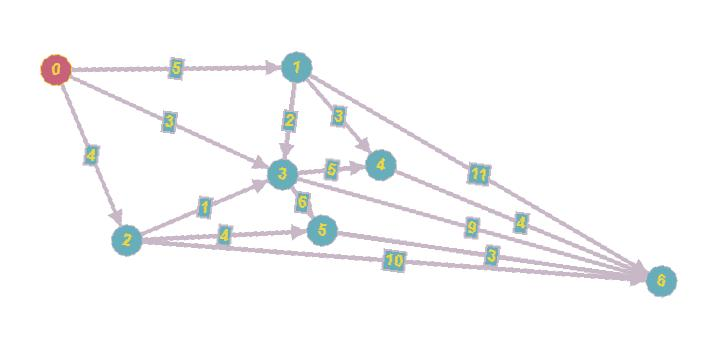

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

def costos_minimos(costo):
    n = len(costo)
    costo_minimo = [row[:] for row in costo]

    # Aplicar el algoritmo de Floyd-Warshall
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if costo_minimo[i][j] > costo_minimo[i][k] + costo_minimo[k][j]:
                    costo_minimo[i][j] = costo_minimo[i][k] + costo_minimo[k][j]

    return costo_minimo

# Representar costos entre embarcaderos, si no hay camino directo, se presenta float('inf').
costo = [
    [0, 5, 4, float('inf'), float('inf'), float('inf'), float('inf')],
    [float('inf'), 0, float('inf'), 2, 3, float('inf'), 11],
    [float('inf'), float('inf'), 0, 1, float('inf'), 4, float('inf')],
    [float('inf'), float('inf'), float('inf'), 0, float('inf'), 6, 5],
    [float('inf'), float('inf'), float('inf'), float('inf'), 0, float('inf'), 9],
    [float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), 0, 10],
    [float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), 0]
]

# Obtener la matriz de costo_minimos
min_costo = costos_minimos(costo)
print("Matriz de costos mínimos:")
for row in min_costo:
    print(row)

# Obtener costo mínimo de un embarcadero a otro
inicio = 0
fin = 6
print(f"El costo mínimo para ir del embarcadero {inicio} al {fin} es {min_costo[inicio][fin]}")



Matriz de costos mínimos:
[0, 5, 4, 5, 8, 8, 10]
[inf, 0, inf, 2, 3, 8, 7]
[inf, inf, 0, 1, inf, 4, 6]
[inf, inf, inf, 0, inf, 6, 5]
[inf, inf, inf, inf, 0, inf, 9]
[inf, inf, inf, inf, inf, 0, 10]
[inf, inf, inf, inf, inf, inf, 0]
El costo mínimo para ir del embarcadero 0 al 6 es 10


## Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X: X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

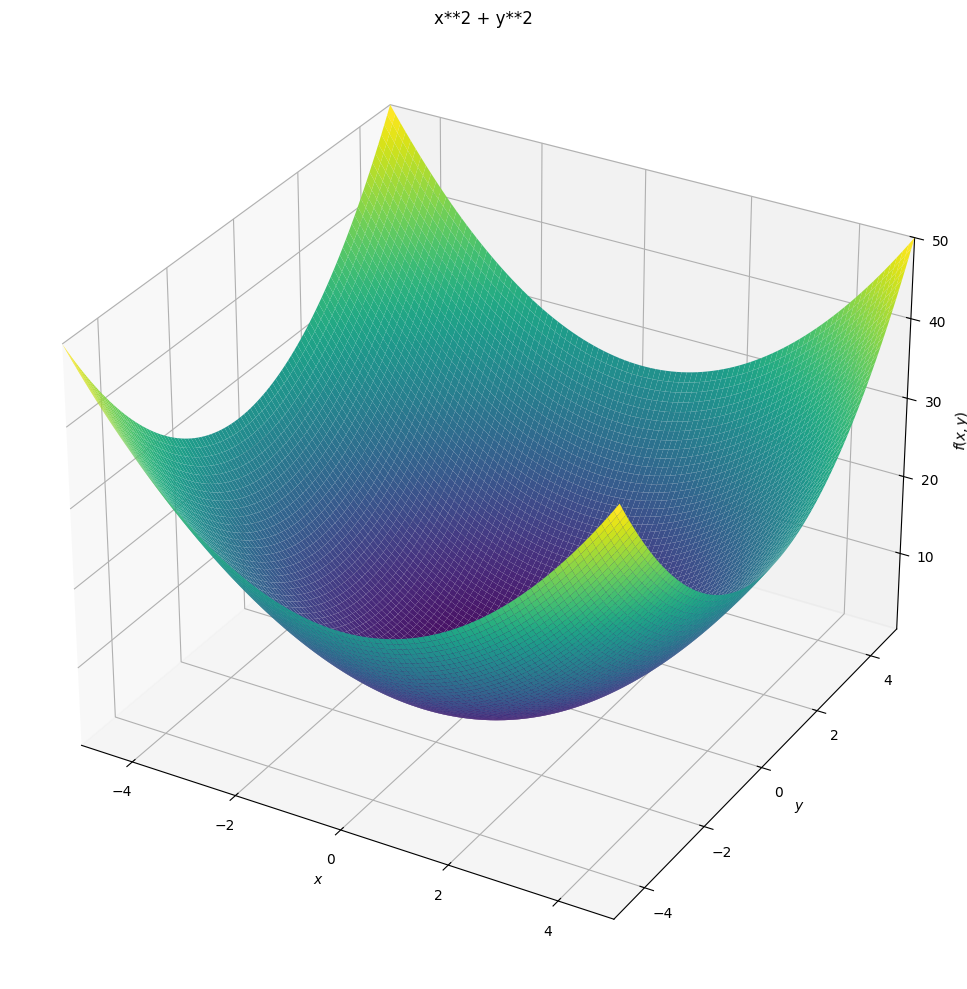

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2, (x,-5,5),(y,-5,5), title='x**2 + y**2', size=(10,10))

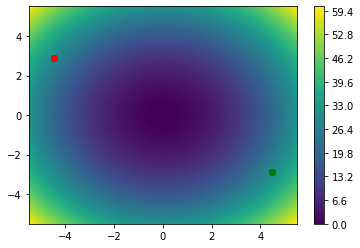

Solucion: [4.472126877392311, -2.888208824237993] 28.341669019900912


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br> </br>
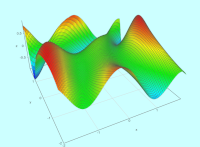


In [ ]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


In [3]:
import numpy as np

# Definir la función
def f(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

# Derivadas parciales
def df_dx(x, y):
    return np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * x * np.cos(2 * x + 1 - np.exp(y)) - 2 * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y))

def df_dy(x, y):
    return -0.5 * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * y * np.cos(2 * x + 1 - np.exp(y)) + np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y)) * np.exp(y)

# Descenso por gradiente
def gradient_descent(learning_rate, num_iterations):
    x, y = 0.0, 0.0  # Inicializar x e y
    for i in range(num_iterations):
        x -= learning_rate * df_dx(x, y)
        y -= learning_rate * df_dy(x, y)
    return x, y

# Parámetros del descenso por gradiente
learning_rate = 0.01
num_iterations = 1000

# Optimizar la función
optimal_x, optimal_y = gradient_descent(learning_rate, num_iterations)
print(f"Los valores óptimos son x = {optimal_x}, y = {optimal_y}")
print(f"El valor mínimo de la función es {f(optimal_x, optimal_y)}")


Los valores óptimos son x = 0.0, y = 0.0
El valor mínimo de la función es 0.1411200080598672


<Figure size 640x480 with 0 Axes>

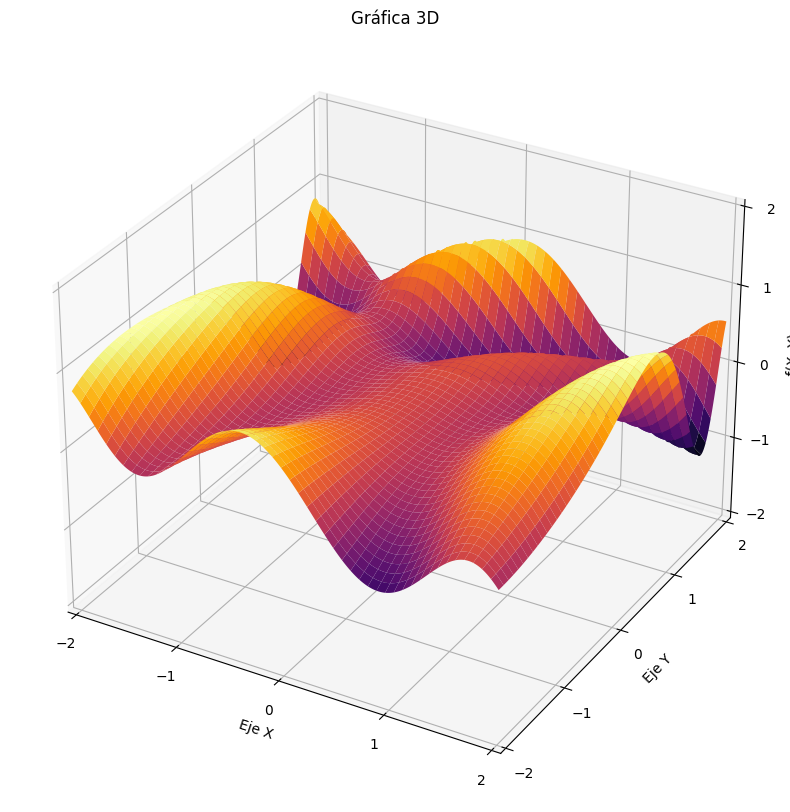

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

# Definir la función
def f(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

# Cuadrícula de puntos (x, y)
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Valores de z para cada punto en la cuadrícula
x=0
y=0
Z = f(X, Y)

# Graficar la función
fig = plt.figure()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')

# Ejes
ax.set_title('Gráfica 3D')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('f(X, Y)')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_zticks([-2, -1, 0, 1, 2])


plt.show()
